In [1]:
import os
import numpy as np
import pandas as pd
from itertools import product
from collections import defaultdict
from utils.constant import ViTExperiment
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
ds = "c100"
run_all = True
true_labels = range(100) if ds == "c100" else None
tgt_split = "repair"

# `101b_analyze_proba_diff.py` をやった後の結果を可視化する

In [2]:
csv_path = os.path.join(f"./{ds}_proba_diff_abs_mean.csv")
df = pd.read_csv(csv_path)
print(df.shape)
df.head()

(6000, 8)


,n,k,tgt_rank,misclf_type,fpfn,fl_method,op,diff_proba_mean
0,5,0,1,all,NaN,vdiff,enh,0.000176
1,5,0,1,all,NaN,random,enh,0.000015
2,5,0,1,all,NaN,vdiff,sup,0.000201
3,5,0,1,all,NaN,random,sup,0.000014
4,5,0,1,src_tgt,NaN,vdiff,enh,0.000106


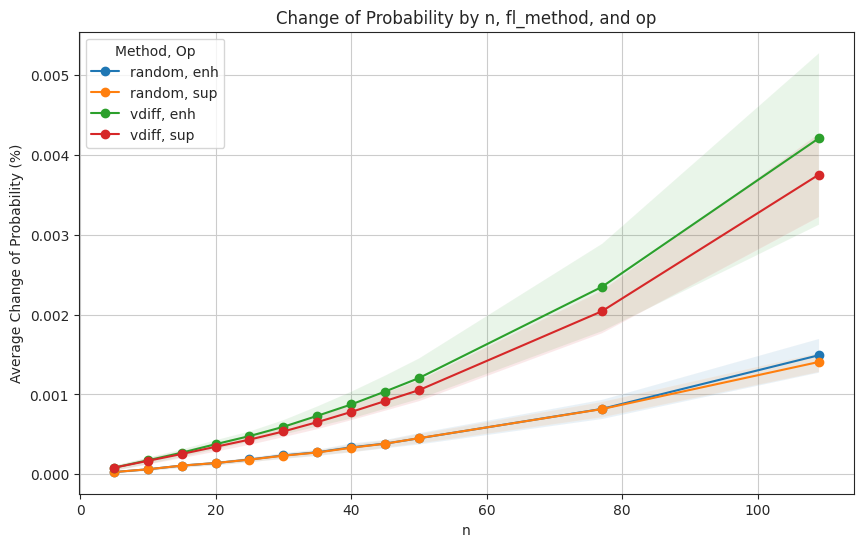

In [3]:
# 平均と標準偏差を計算
grouped_df = df.groupby(["n", "fl_method", "op"])["diff_proba_mean"].agg(["mean", "std"]).reset_index()

# プロット
plt.figure(figsize=(10, 6))
for fl_method in grouped_df["fl_method"].unique():
    for op in grouped_df["op"].unique():
        # fl_method, opごとに，nに対する平均と標準偏差をプロット
        subset = grouped_df[(grouped_df["fl_method"] == fl_method) & (grouped_df["op"] == op)]
        plt.plot(subset["n"], subset["mean"], label=f"{fl_method}, {op}", marker="o")
        plt.fill_between(
            subset["n"],
            subset["mean"] - subset["std"],
            subset["mean"] + subset["std"],
            alpha=0.1
        )

# グラフの設定
plt.xlabel("n")
plt.ylabel("Average Change of Probability (%)")
plt.title("Change of Probability by n, fl_method, and op")
plt.legend(title="Method, Op")
plt.grid(True)
plt.show()